In [1]:
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

2024-03-31 12:58:24.727644: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 12:58:25.024817: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 12:58:25.024902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 12:58:25.080870: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 12:58:25.197912: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 12:58:25.200134: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
file_path = 'database_2c.xlsx'
data = pd.read_excel(file_path)

In [4]:
# 分割特征和标签
X = data[['x_1', 'x_2', 'x_3']].values  # 输入特征：光电流值
y = data[['y_1', 'y_2' ]].values  # 输出标签：y_1, y_2, y_3 和 wavelength

In [5]:
print(X.shape, y.shape)

(560, 3) (560, 2)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
print(X_scaled.shape)
X[0]


(560, 3)


array([ 0.00902681, -0.04783698, -0.01826162])

In [8]:
X_scaled[0]

array([ 0.02816098, -0.14049195, -0.03015153])

<!-- z -->

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# 定义神经网络模型
input_layer = Input(shape=(3,))
hidden_layer_1 = Dense(1024, activation='relu')(input_layer)
hidden_layer_2 = Dense(512, activation='relu')(hidden_layer_1)

# 定义多输出层
output_y1 = Dense(1, activation='sigmoid', name='spine')(hidden_layer_2)
output_y2 = Dense(1, activation='sigmoid', name='wavelength')(hidden_layer_2)


In [20]:
# model
model = Model(inputs=input_layer, outputs=[output_y1, output_y2])

# 编译模型
model.compile(optimizer='adam', 
              loss={'spine': 'binary_crossentropy',
                    'wavelength': 'binary_crossentropy',
                    },
              metrics={'spine': 'accuracy',
                       'wavelength': 'accuracy',
                       })

In [21]:
model.fit(X_train, {'spine': y_train[:,0], 'wavelength': y_train[:,1]},
          epochs=100, batch_size=32)

Epoch 1/100
14/14 [==============================] - 1s 4ms/step - loss: -12.0248 - spine_loss: -5.2566 - wavelength_loss: -6.7682 - spine_accuracy: 0.1049 - wavelength_accuracy: 0.1272
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: -77.1328 - spine_loss: -33.9311 - wavelength_loss: -43.2017 - spine_accuracy: 0.1049 - wavelength_accuracy: 0.1272
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: -257.7179 - spine_loss: -112.1094 - wavelength_loss: -145.6085 - spine_accuracy: 0.1049 - wavelength_accuracy: 0.1272
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: -685.6757 - spine_loss: -297.4786 - wavelength_loss: -388.1970 - spine_accuracy: 0.1049 - wavelength_accuracy: 0.1272
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: -1542.2489 - spine_loss: -677.0796 - wavelength_loss: -865.1693 - spine_accuracy: 0.1049 - wavelength_accuracy: 0.1272
Epoch 6/100
14/14 [==============================] -

In [23]:
model.evaluate(X_test, {'spine': y_test[:,0], 'wavelength': y_test[:,1]})

4/4 [==============================] - 0s 2ms/step - loss: -37613300.0000 - spine_loss: -16859800.0000 - wavelength_loss: -20753504.0000 - spine_accuracy: 0.2054 - wavelength_accuracy: 0.2054


[-37613300.0, -16859800.0, -20753504.0, 0.2053571492433548, 0.2053571492433548]

1/1 [==============================] - 0s 32ms/step - loss: 7382903.0000 - spine_loss: 3681115.5000 - wavelength_loss: 3701787.2500 - spine_accuracy: 0.0000e+00 - wavelength_accuracy: 0.0000e+00


2024-03-31 13:12:57.676367: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 20ms/step - loss: 7376282.0000 - spine_loss: 3677812.0000 - wavelength_loss: 3698470.2500 - spine_accuracy: 0.0000e+00 - wavelength_accuracy: 0.0000e+00


2024-03-31 13:13:34.973165: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 28ms/step - loss: 14852958.0000 - spine_loss: 7405715.5000 - wavelength_loss: 7447243.0000 - spine_accuracy: 0.0000e+00 - wavelength_accuracy: 0.0000e+00


2024-03-31 13:14:23.819083: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 27ms/step - loss: 8755907.0000 - spine_loss: 4365680.0000 - wavelength_loss: 4390227.0000 - spine_accuracy: 0.0000e+00 - wavelength_accuracy: 0.0000e+00


2024-03-31 13:18:59.101582: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 46ms/step - loss: 11277819.0000 - spine_loss: 5623115.5000 - wavelength_loss: 5654703.5000 - spine_accuracy: 0.0000e+00 - wavelength_accuracy: 0.0000e+00


2024-03-31 13:19:22.704045: W tensorflow/core/data/root_dataset.cc:342] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 72ms/step - loss: 17004528.0000 - spine_loss: 8478474.0000 - wavelength_loss: 8526053.0000 - spine_accuracy: 0.0000e+00 - wavelength_accuracy: 0.0000e+00


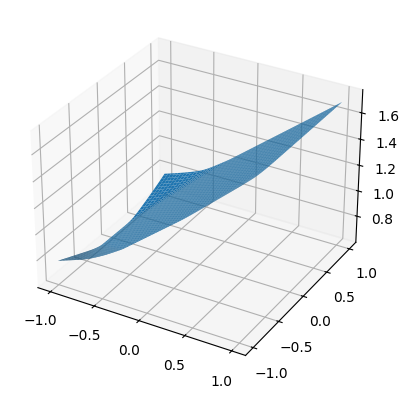

In [27]:
# draw the landscape of the loss function
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 生成数据
x = np.linspace(-1, 1, 100) # 生成-1到1之间的100个数
y = np.linspace(-1, 1, 100) # 生成-1到1之间的100个数
x, y = np.meshgrid(x, y) # 生成网格点坐标矩阵
z = np.zeros_like(x) # 生成与x相同大小的矩阵

for i in range(100):
    for j in range(100):
        z[i, j] = model.evaluate(np.array([[x[i, j], y[i, j], 0]]), {'spine': np.array([0]), 'wavelength': np.array([0])})[0] # 计算每个点的loss值

# 绘制3D图
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
plt.show()


In [24]:
x_new = np.array([[0.00902681019927517,-0.0478369817966006, -0.0182616201106269]]) # pretend these are new instances
y_pred = model.predict(x_new)


1/1 [==============================] - 0s 102ms/step


In [25]:
y_pred

[array([[1.]], dtype=float32), array([[1.]], dtype=float32)]

In [26]:
x_new = np.array([[0.0489905578199103,0.0446838971425236, -0.0991099775186081]]) # pretend these are new instances
y_pred = model.predict(x_new)
y_pred

1/1 [==============================] - 0s 47ms/step


[array([[1.]], dtype=float32), array([[1.]], dtype=float32)]